In [ ]:
import pandas as pd

# Charger le jeu de données
chemin_fichier = "datas_2024.csv"
data = pd.read_csv(chemin_fichier)

# Standardiser les noms des colonnes
noms_colonnes_ajustés = [
    "Traitement",
    "Âge_avant_traitement",
    "Âge_fin_traitement",
    "Poids_avant_traitement",
    "Poids_fin_traitement",
    "Temps_total_test_sec",
    "Temps_rotarod_sec",
    "Force_motrice_newton",
    "Distance_cm",
    "Temps_total_test_sec1",
    "Temps_au_centre_sec",
    "Temps_périphérie_sec",
    "Temps_test_sec",
    "Temps_bras_ouvert",
    "Temps_bras_fermé",
    "Erreurs_test_mémoire",
    "Pourcentage_alternance",
    "Temps_habituation_cookie_sec",
    "Temps_test_cookie_caché_sec",
    "Volume_hippocampique_mm3"
]
data.columns = noms_colonnes_ajustés

# Gérer la valeur manquante
groupe_2 = data[data["Traitement"] == "Ages"]
moyenne_rotarod = groupe_2["Temps_rotarod_sec"].mean()
data.loc[data["Temps_rotarod_sec"].isnull(), "Temps_rotarod_sec"] = moyenne_rotarod

# Grouper les données par "Traitement"
groupes = data.groupby("Traitement")

# Validation : Compter le nombre de lignes par groupe
print("\nComptage des lignes par groupe :")
print(groupes.size())

# Enregistrer le jeu de données nettoyé et classifié
chemin_fichier_classifié = "données_classifiées_nettoyées_2024.csv"
data.to_csv(chemin_fichier_classifié, index=False)
print(f"\nLe jeu de données classifié et nettoyé a été enregistré sous : {chemin_fichier_classifié}")

# Afficher un aperçu des données groupées
for nom_groupe, groupe in groupes:
    print(f"\nAperçu du groupe {nom_groupe} :")
    print(groupe.head())


Comptage des lignes par groupe :
Traitement
Ages                             12
Ages en restriction calorique    12
ages en High fat diet            12
jeune                             6
dtype: int64

Le jeu de données classifié et nettoyé a été enregistré sous : données_classifiées_nettoyées_2024.csv

Aperçu du groupe Ages :
   Traitement  Âge_avant_traitement  Âge_fin_traitement  \
6        Ages                    12                  15   
7        Ages                    12                  15   
8        Ages                    12                  15   
9        Ages                    12                  15   
10       Ages                    12                  15   

    Poids_avant_traitement  Poids_fin_traitement  Temps_total_test_sec  \
6                       33                    35                   300   
7                       32                    32                   300   
8                       28                    31                   300   
9                  

# Analyse des Poids

## Résultats Principaux
1. **Jeune** : Aucune variation significative du poids.
2. **Ages** : Réduction modérée et significative du poids.
3. **Ages en restriction calorique** : Réduction importante et très significative.
4. **Ages en High Fat Diet** : Augmentation importante et très significative.

## Conclusions
- La **restriction calorique** réduit efficacement le poids des souris âgées.
- Le **régime hypergras** provoque une forte prise de poids.
- Ces résultats confirment que les régimes alimentaires influencent fortement le vieillissement corporel.

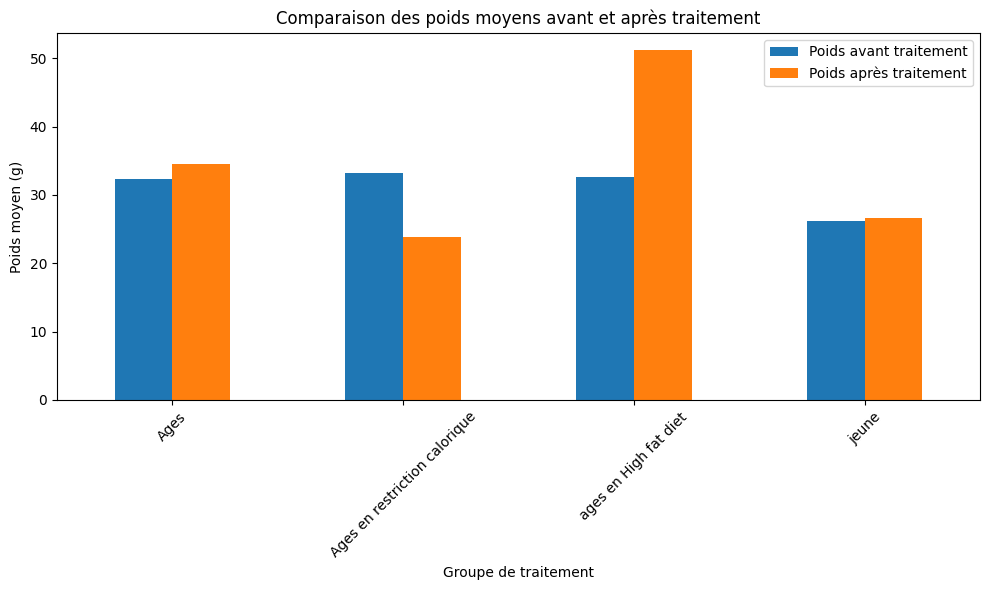

                               t-statistic       p-value
jeune                            -0.455383  6.585616e-01
Ages                             -2.721466  1.246275e-02
Ages en restriction calorique    11.619540  7.362193e-11
ages en High fat diet            -7.780227  9.344528e-08


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Charger les données nettoyées classifiées
file_path = "données_classifiées_nettoyées_2024.csv"
data = pd.read_csv(file_path)

# Extraction des données pertinentes pour l'analyse des poids avant et après
group_data = data.groupby("Traitement")[["Poids_avant_traitement", "Poids_fin_traitement"]].mean()

# Création du graphique des poids moyens avant et après le traitement par groupe
group_data.plot(kind='bar', figsize=(10, 6))
plt.title("Comparaison des poids moyens avant et après traitement")
plt.xlabel("Groupe de traitement")
plt.ylabel("Poids moyen (g)")
plt.legend(["Poids avant traitement", "Poids après traitement"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("comparaison_poids_moyens.png")  # Enregistrer le graphique
plt.show()

# Analyse statistique : Test t entre poids avant et après pour chaque groupe
results = {}
for group in data['Traitement'].unique():
    group_subset = data[data['Traitement'] == group]
    t_stat, p_value = ttest_ind(group_subset['Poids_avant_traitement'], group_subset['Poids_fin_traitement'])
    results[group] = {"t-statistic": t_stat, "p-value": p_value}

# Conversion des résultats en DataFrame pour affichage
stat_results = pd.DataFrame(results).T
print(stat_results)

# Enregistrer les résultats statistiques dans un fichier CSV
stat_results.to_csv("resultats_statistiques_poids.csv")


# Analyse des Fonctions Motrices

## Objectif
Cette analyse compare les effets du vieillissement, d'un régime hypergras (High Fat Diet) et de la restriction calorique sur les fonctions motrices des souris à travers trois tests :
- **Rotarod** : Coordination et endurance
- **Grip Test** : Force musculaire
- **Openfield (Distance)** : Activité locomotrice

## Résultats Clés

### **1. Effets du Vieillissement (Groupe 1 vs Groupe 2)**
- **Rotarod** : Déclin significatif de la coordination/endurance (**p = 0.0060**).
- **Grip Test** : Baisse importante de la force musculaire (**p = 0.0031**).
- **Openfield** : Aucune différence significative de l'activité locomotrice (**p = 0.2316**).

### **2. Impact du Régime Hypergras (Groupe 2 vs Groupe 3)**
- **Rotarod** : Aggravation des déficits moteurs (**p = 0.0360**).
- **Grip Test** : Diminution drastique de la force musculaire (**p = 0.000001**).
- **Openfield** : Réduction significative de l'activité locomotrice (**p = 0.000000008**).

### **3. Effets de la Restriction Calorique (Groupe 2 vs Groupe 4)**
- **Rotarod** : Amélioration significative de la coordination/endurance (**p = 0.0064**).
- **Grip Test** : Amélioration notable de la force musculaire (**p = 0.000001**).
- **Openfield** : Augmentation de l'activité locomotrice (**p = 0.00000001**).

### **4. Comparaison Régime Hypergras vs Restriction Calorique (Groupe 3 vs Groupe 4)**
- **Rotarod** : La restriction calorique surpasse nettement le régime hypergras (**p = 0.000001**).
- **Grip Test** : Protection très marquée par la restriction calorique (**p = 0.000000002**).
- **Openfield** : Effet opposé évident entre les deux régimes (**p = 0.0000000000655**).

## Conclusions
1. **Vieillissement** : Le vieillissement entraîne un déclin des fonctions motrices, particulièrement en coordination (Rotarod) et force musculaire (Grip Test).
2. **Régime Hypergras** : Accentue les déficits moteurs liés à l'âge.
3. **Restriction Calorique** : Protège efficacement contre les déclins moteurs et améliore les performances.
4. **Opposition des Régimes** : La restriction calorique démontre un effet protecteur clair, tandis que le régime hypergras aggrave les déficits.

Ces résultats confirment l'importance des interventions alimentaires pour ralentir les effets du vieillissement sur les fonctions motrices.

# Annexe

### Test du Rotarod (Coordination et Endurance) :
Groupe 1 vs. Groupe 2 :
- Statistique t : 3.1973, Valeur p : 0.0060

Groupe 2 vs. Groupe 3 :
- Statistique t : 2.2435, Valeur p : 0.0360

Groupe 2 vs. Groupe 4 :
- Statistique t : -3.1395, Valeur p : 0.0064

Groupe 3 vs. Groupe 4 :
- Statistique t : -6.9925, Valeur p : 0.000001

### Test de Grip (Force musculaire) :
Groupe 1 vs. Groupe 2 :
- Statistique t : 5.0866, Valeur p : 0.0031

Groupe 2 vs. Groupe 3 :
- Statistique t : 6.7708, Valeur p : 0.000001

Groupe 2 vs. Groupe 4 :
- Statistique t : -7.4825, Valeur p : 0.000001

Groupe 3 vs. Groupe 4 :
- Statistique t : -11.7672, Valeur p : 0.000000002

### Test Openfield (Distance parcourue - Activité locomotrice) :
Groupe 1 vs. Groupe 2 :
- Statistique t : 1.2503, Valeur p : 0.2316

Groupe 2 vs. Groupe 3 :
- Statistique t : 11.2142, Valeur p : 0.000000008

Groupe 2 vs. Groupe 4 :
- Statistique t : -9.4958, Valeur p : 0.00000001

Groupe 3 vs. Groupe 4 :
- Statistique t : -18.9693, Valeur p : 0.0000000000655

Analyse des résultats pour Rotarod:

Comparaison: Group 1: Young mice (Standard diet) vs Group 2: Middle-aged mice (Standard diet)
T-statistic: 3.1973, P-value: 6.0484e-03

Comparaison: Group 2: Middle-aged mice (Standard diet) vs Group 3: Middle-aged mice (High-fat diet)
T-statistic: 2.2435, P-value: 3.6011e-02

Comparaison: Group 2: Middle-aged mice (Standard diet) vs Group 4: Middle-aged mice (Calorie restriction)
T-statistic: -3.1395, P-value: 6.4187e-03

Comparaison: Group 3: Middle-aged mice (High-fat diet) vs Group 4: Middle-aged mice (Calorie restriction)
T-statistic: -6.9925, P-value: 1.3633e-06


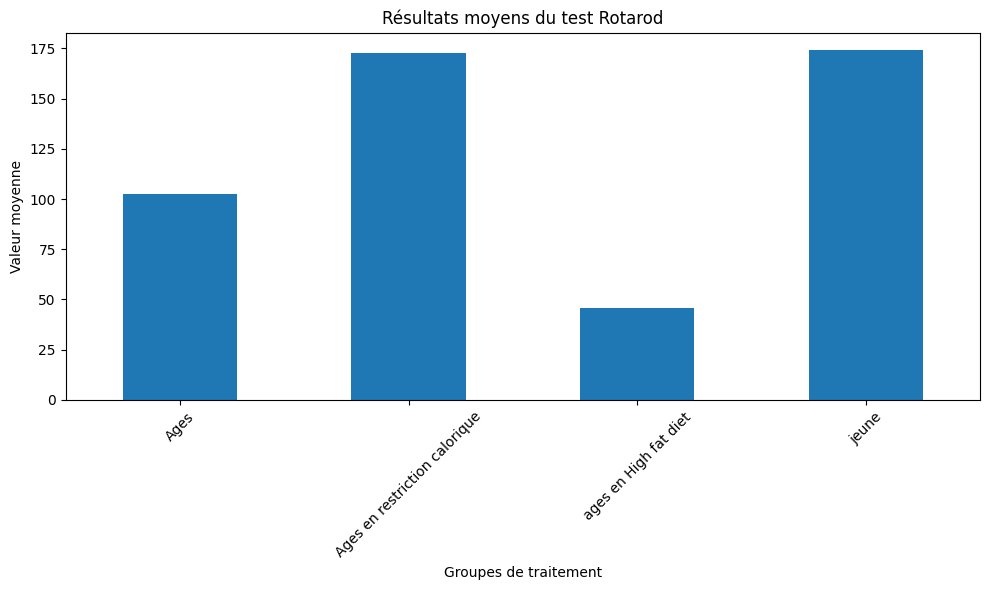

Analyse des résultats pour Grip Test:

Comparaison: Group 1: Young mice (Standard diet) vs Group 2: Middle-aged mice (Standard diet)
T-statistic: 5.0866, P-value: 3.1281e-03

Comparaison: Group 2: Middle-aged mice (Standard diet) vs Group 3: Middle-aged mice (High-fat diet)
T-statistic: 6.7708, P-value: 1.2254e-06

Comparaison: Group 2: Middle-aged mice (Standard diet) vs Group 4: Middle-aged mice (Calorie restriction)
T-statistic: -7.4825, P-value: 1.0480e-06

Comparaison: Group 3: Middle-aged mice (High-fat diet) vs Group 4: Middle-aged mice (Calorie restriction)
T-statistic: -11.7672, P-value: 2.5369e-10


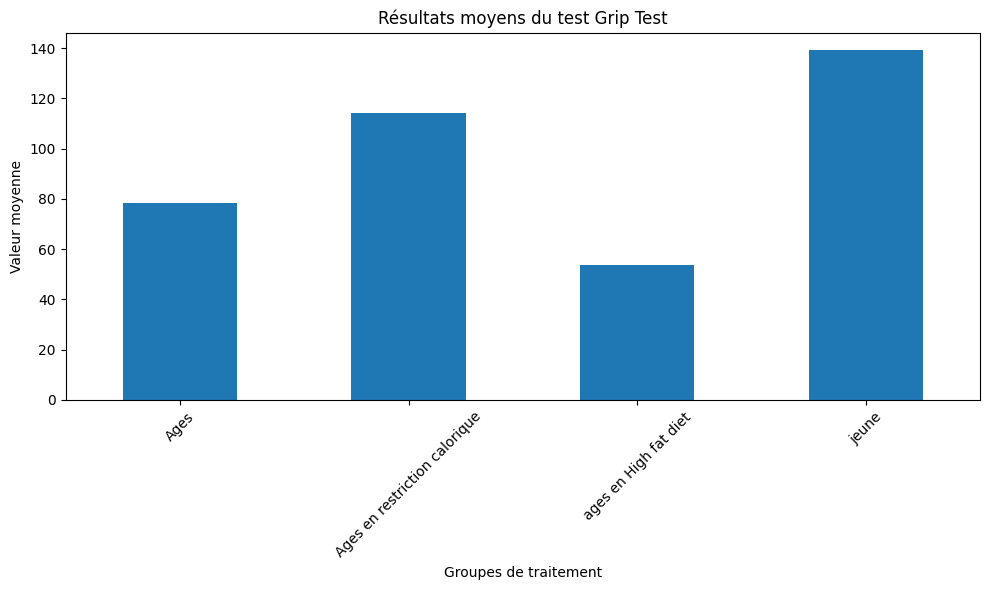

Analyse des résultats pour Openfield (Distance):

Comparaison: Group 1: Young mice (Standard diet) vs Group 2: Middle-aged mice (Standard diet)
T-statistic: 1.2503, P-value: 2.3155e-01

Comparaison: Group 2: Middle-aged mice (Standard diet) vs Group 3: Middle-aged mice (High-fat diet)
T-statistic: 11.2142, P-value: 8.2508e-09

Comparaison: Group 2: Middle-aged mice (Standard diet) vs Group 4: Middle-aged mice (Calorie restriction)
T-statistic: -9.4958, P-value: 1.0044e-08

Comparaison: Group 3: Middle-aged mice (High-fat diet) vs Group 4: Middle-aged mice (Calorie restriction)
T-statistic: -18.9693, P-value: 6.5540e-11


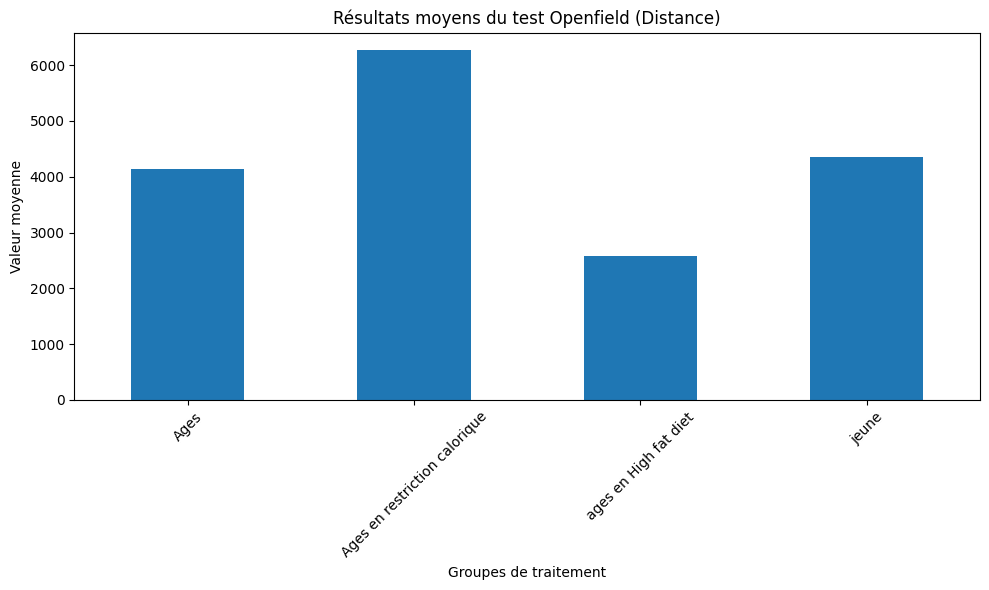

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Charger les données nettoyées classifiées
file_path = "données_classifiées_nettoyées_2024.csv"
data = pd.read_csv(file_path)

# Filtrer les colonnes des fonctions motrices
motor_functions = {
    "Rotarod": "Temps_rotarod_sec",
    "Grip Test": "Force_motrice_newton",
    "Openfield (Distance)": "Distance_cm"
}

# Définir les groupes pour les comparaisons
group_labels = {
    "jeune": "Group 1: Young mice (Standard diet)",
    "Ages": "Group 2: Middle-aged mice (Standard diet)",
    "ages en High fat diet": "Group 3: Middle-aged mice (High-fat diet)",
    "Ages en restriction calorique": "Group 4: Middle-aged mice (Calorie restriction)"
}

group_pairs = [
    ("jeune", "Ages"),
    ("Ages", "ages en High fat diet"),
    ("Ages", "Ages en restriction calorique"),
    ("ages en High fat diet", "Ages en restriction calorique")
]

results = {}

# Analyse et visualisation des comparaisons
for test, column in motor_functions.items():
    print(f"Analyse des résultats pour {test}:")
    test_results = {}
    
    for group1, group2 in group_pairs:
        # Sous-ensembles des données pour les groupes à comparer
        group1_data = data[data["Traitement"] == group1][column]
        group2_data = data[data["Traitement"] == group2][column]
        
        # Test t pour comparer les groupes
        t_stat, p_value = ttest_ind(group1_data, group2_data, equal_var=False)
        test_results[f"{group_labels[group1]} vs {group_labels[group2]}"] = {
            "t-statistic": t_stat,
            "p-value": p_value
        }
        
        # Affichage de la comparaison
        print(f"\nComparaison: {group_labels[group1]} vs {group_labels[group2]}")
        print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4e}")
    
    # Stocker les résultats pour chaque test
    results[test] = test_results

    # Visualisation des résultats par groupe
    group_means = data.groupby("Traitement")[column].mean()
    plt.figure(figsize=(10, 6))
    group_means.plot(kind="bar")
    plt.title(f"Résultats moyens du test {test}")
    plt.ylabel("Valeur moyenne")
    plt.xlabel("Groupes de traitement")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"comparaison_{test.replace(' ', '_').lower()}.png")
    plt.show()

# Sauvegarde des résultats dans des fichiers CSV
for test, test_results in results.items():
    df_results = pd.DataFrame(test_results).T
    df_results.to_csv(f"resultats_statistiques_{test.replace(' ', '_').lower()}.csv")

